In [1]:
import pandas as pd
import matplotlib.pyplot as plt
books = pd.read_csv('data/Books.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [2]:
users = pd.read_csv('data/Users.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [3]:
ratings = pd.read_csv('data/Book-Ratings.csv', sep=';', on_bad_lines='skip', encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [4]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


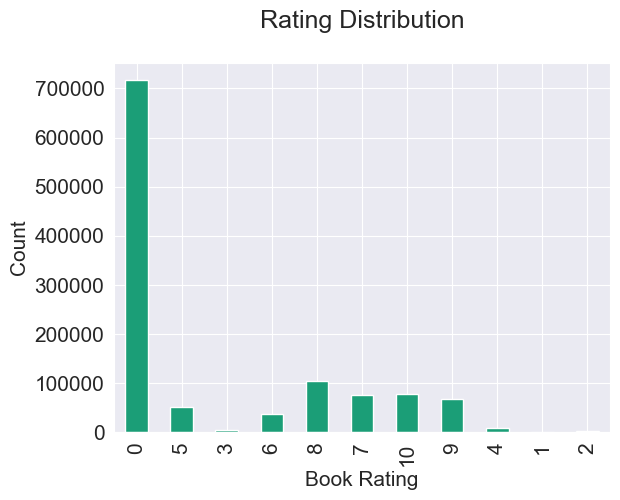

In [5]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar', colormap='Dark2')
plt.title('Rating Distribution\n')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

In [6]:
print(books.shape)
print(list(books.columns))

(271379, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [7]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


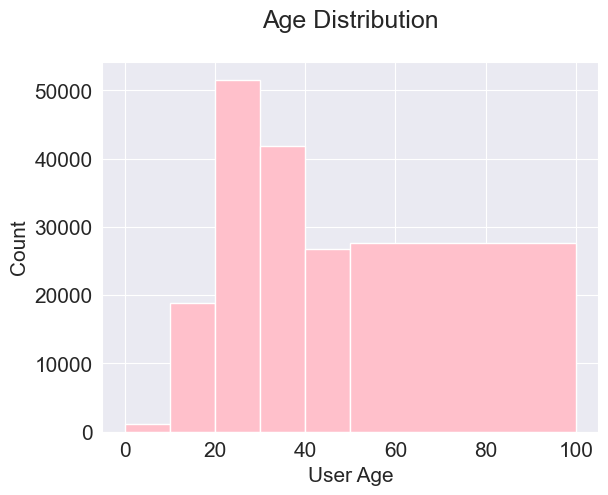

In [8]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100], color='pink')
plt.title('Age Distribution\n')
plt.xlabel('User Age')
plt.ylabel('Count')
plt.show()

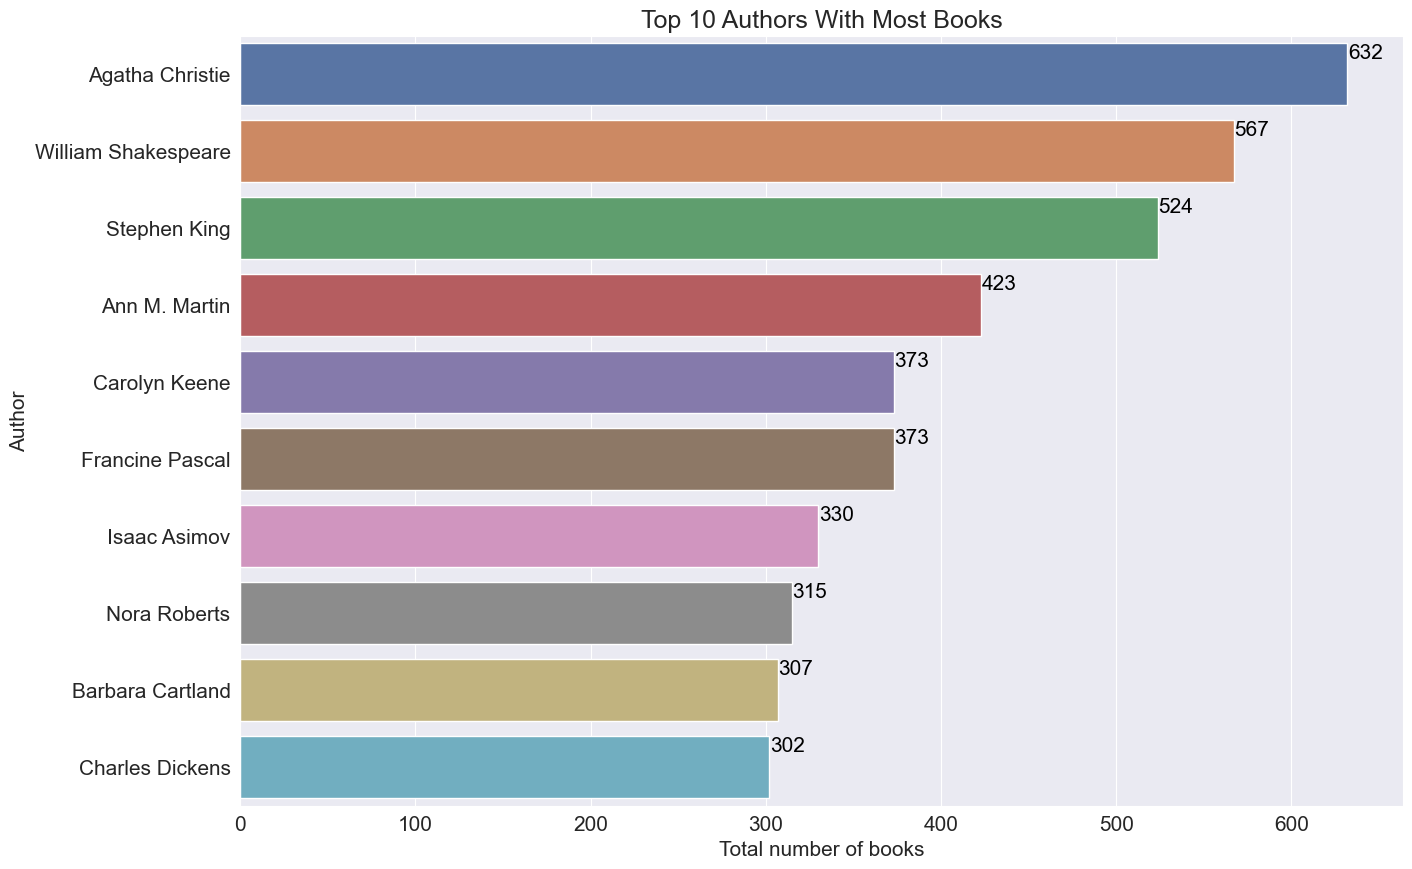

In [9]:
import seaborn as sns
most_books = books.groupby('bookAuthor')['bookTitle'].count().reset_index().sort_values('bookTitle', ascending=False).head(10).set_index('bookAuthor')
plt.figure(figsize=(15,10))
graph = sns.barplot(x=most_books['bookTitle'], y=most_books.index, palette='deep')
graph.set_title("Top 10 Authors With Most Books")
graph.set_xlabel("Total number of books")
graph.set_ylabel("Author")
totals = []
for i in graph.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in graph.patches:
    graph.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [10]:
counts = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts[counts >= 100].index)]

In [11]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID        ISBN  bookRating  \
0  276925  002542730X          10   
1  277427  002542730X          10   
2    3363  002542730X           0   
3   10030  002542730X           7   
4   11676  002542730X           6   

                                           bookTitle  
0  Politically Correct Bedtime Stories: Modern Ta...  
1  Politically Correct Bedtime Stories: Modern Ta...  
2  Politically Correct Bedtime Stories: Modern Ta...  
3  Politically Correct Bedtime Stories: Modern Ta...  
4  Politically Correct Bedtime Stories: Modern Ta...  


In [12]:
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

book_rating_count = (combine_book_rating.
groupby(by = ['bookTitle'])['bookRating'].
count().
reset_index().
rename(columns = {'bookRating': 'totalRatingCount'})
[['bookTitle', 'totalRatingCount']]
)
print(book_rating_count.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 3
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [13]:
rating_with_totalRatingCount = combine_book_rating.merge(book_rating_count, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_rating_count['totalRatingCount'].describe())

   userID        ISBN  bookRating  \
0  276925  002542730X          10   
1  277427  002542730X          10   
2    3363  002542730X           0   
3   10030  002542730X           7   
4   11676  002542730X           6   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...               105  
1  Politically Correct Bedtime Stories: Modern Ta...               105  
2  Politically Correct Bedtime Stories: Modern Ta...               105  
3  Politically Correct Bedtime Stories: Modern Ta...               105  
4  Politically Correct Bedtime Stories: Modern Ta...               105  
count   182503.000
mean         3.322
std          9.138
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        617.000
Name: totalRatingCount, dtype: float64


In [14]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

   userID        ISBN  bookRating  \
0  276925  002542730X          10   
1  277427  002542730X          10   
2    3363  002542730X           0   
3   10030  002542730X           7   
4   11676  002542730X           6   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...               105  
1  Politically Correct Bedtime Stories: Modern Ta...               105  
2  Politically Correct Bedtime Stories: Modern Ta...               105  
3  Politically Correct Bedtime Stories: Modern Ta...               105  
4  Politically Correct Bedtime Stories: Modern Ta...               105  


In [15]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

   userID        ISBN  bookRating  \
1  277427  002542730X          10   
2    3363  002542730X           0   
3   10030  002542730X           7   
5   12538  002542730X          10   
6   13552  002542730X           0   

                                           bookTitle  totalRatingCount  \
1  Politically Correct Bedtime Stories: Modern Ta...               105   
2  Politically Correct Bedtime Stories: Modern Ta...               105   
3  Politically Correct Bedtime Stories: Modern Ta...               105   
5  Politically Correct Bedtime Stories: Modern Ta...               105   
6  Politically Correct Bedtime Stories: Modern Ta...               105   

                        Location  
1          gilbert, arizona, usa  
2      knoxville, tennessee, usa  
3  pittsburgh, pennsylvania, usa  
5          byron, minnesota, usa  
6        cordova, tennessee, usa  


In [16]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [17]:
def get_recs(book):
    query_name = book
    query_index = list(us_canada_user_rating_pivot.index.values).index(query_name)
    distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

    for num in range(len(distances.flatten())):
        if num == 0:
            print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(num, us_canada_user_rating_pivot.index[indices.flatten()[num]], distances.flatten()[num]))
    return

In [18]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.interactive(get_recs, {'manual': True, 'manual_name': 'Get Recs'}, book=widgets.Dropdown(options=list(us_canada_user_rating_pivot.index.values), description='Book:'))
display(w)

interactive(children=(Dropdown(description='Book:', options=('1984', '1st to Die: A Novel', '2010: Odyssey Two…

In [19]:
from pathlib import Path
filepath = Path('./data/cleaned_data.csv')
combine_book_rating.to_csv(filepath)